In [107]:
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv('CS143_project.csv')
df.rename(columns={'Cause of death or injury': 'cause', 'Risk factor': 'risk'}, inplace=True)
df

ID                                              cause  \
0      0                            Colon and rectum cancer   
1      1                          Peripheral artery disease   
2      2                         Hypertensive heart disease   
3      3                            Rheumatic heart disease   
4      4                                      Larynx cancer   
5      5                            Colon and rectum cancer   
6      6                                     Ovarian cancer   
7      7      Other cardiovascular and circulatory diseases   
8      8                    Atrial fibrillation and flutter   
9      9                             Chronic kidney disease   
10    10                         Hypertensive heart disease   
11    11                                       Liver cancer   
12    12                         Hypertensive heart disease   
13    13                                    Aortic aneurysm   
14    14                          Peripheral artery disease   
15    15                                     Uterine cancer   
16    16                             Chronic kidney disease   
17    17                                     Uterine cancer   
18    18                                     Stomach cancer   
19    19                             Ischemic heart disease   
20    20                                  Diabetes mellitus   
21    21                            Cerebrovascular disease   
22    22                             Ischemic heart disease   
23    23  Cirrhosis and other chronic liver diseases due...   
24    24                     Cardiomyopathy and myocarditis   
25    25                            Cerebrovascular disease   
26    26                                 Nasopharynx cancer   
27    27                                    Aortic aneurysm   
28    28                             Ischemic heart disease   
29    29                                  Esophageal cancer   
..   ...                                                ...   
183  183                                  Pancreatic cancer   
184  184                                      Breast cancer   
185  185                 Other chronic respiratory diseases   
186  186                Tracheal, bronchus, and lung cancer   
187  187                             Ischemic heart disease   
188  188                            Cerebrovascular disease   
189  189                                             Asthma   
190  190                                   Multiple myeloma   
191  191                                      Kidney cancer   
192  192                            Cerebrovascular disease   
193  193                             Ischemic heart disease   
194  194      Other cardiovascular and circulatory diseases   
195  195                          Peripheral artery disease   
196  196                    Atrial fibrillation and flutter   
197  197                             Ischemic heart disease   
198  198                            Cerebrovascular disease   
199  199                                    Cervical cancer   
200  200                    Atrial fibrillation and flutter   
201  201                                             Asthma   
202  202                                 Nasopharynx cancer   
203  203                             Ischemic heart disease   
204  204                             Ischemic heart disease   
205  205                                  Diabetes mellitus   
206  206                            Cerebrovascular disease   
207  207                             Ischemic heart disease   
208  208                             Ischemic heart disease   
209  209                             Ischemic heart disease   
210  210                Tracheal, bronchus, and lung cancer   
211  211                Tracheal, bronchus, and lung cancer   
212  212                Tracheal, bronchus, and lung cancer   

                                         risk  
0                            Diet low in milk  
1  

In [109]:
df = df.sort_values('risk')

In [110]:
nodes_risk = df['risk'].values.tolist()
nodes_cause = df['cause'].values.tolist()
nodes_match = [list(a) for a in zip(nodes_risk,nodes_cause)]

In [111]:
nodes_match

[['Alcohol use',
  'Cirrhosis and other chronic liver diseases due to alcohol use'],
 ['Alcohol use', 'Nasopharynx cancer'],
 ['Alcohol use', 'Lip and oral cavity cancer'],
 ['Alcohol use', 'Diabetes mellitus'],
 ['Alcohol use', 'Esophageal cancer'],
 ['Alcohol use', 'Larynx cancer'],
 ['Alcohol use', 'Hypertensive heart disease'],
 ['Alcohol use', 'Ischemic heart disease'],
 ['Alcohol use', 'Breast cancer'],
 ['Alcohol use', 'Other pharynx cancer'],
 ['Alcohol use', 'Colon and rectum cancer'],
 ['Alcohol use', 'Liver cancer'],
 ['Alcohol use', 'Atrial fibrillation and flutter'],
 ['Alcohol use', 'Tuberculosis'],
 ['Alcohol use', 'Cardiomyopathy and myocarditis'],
 ['Alcohol use', 'Cerebrovascular disease'],
 ['Ambient ozone pollution', 'Chronic obstructive pulmonary disease'],
 ['Ambient particulate matter pollution', 'Cerebrovascular disease'],
 ['Ambient particulate matter pollution',
  'Tracheal, bronchus, and lung cancer'],
 ['Ambient particulate matter pollution',
  'Chronic obst

In [112]:


# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size

Current size: [50.0, 50.0]


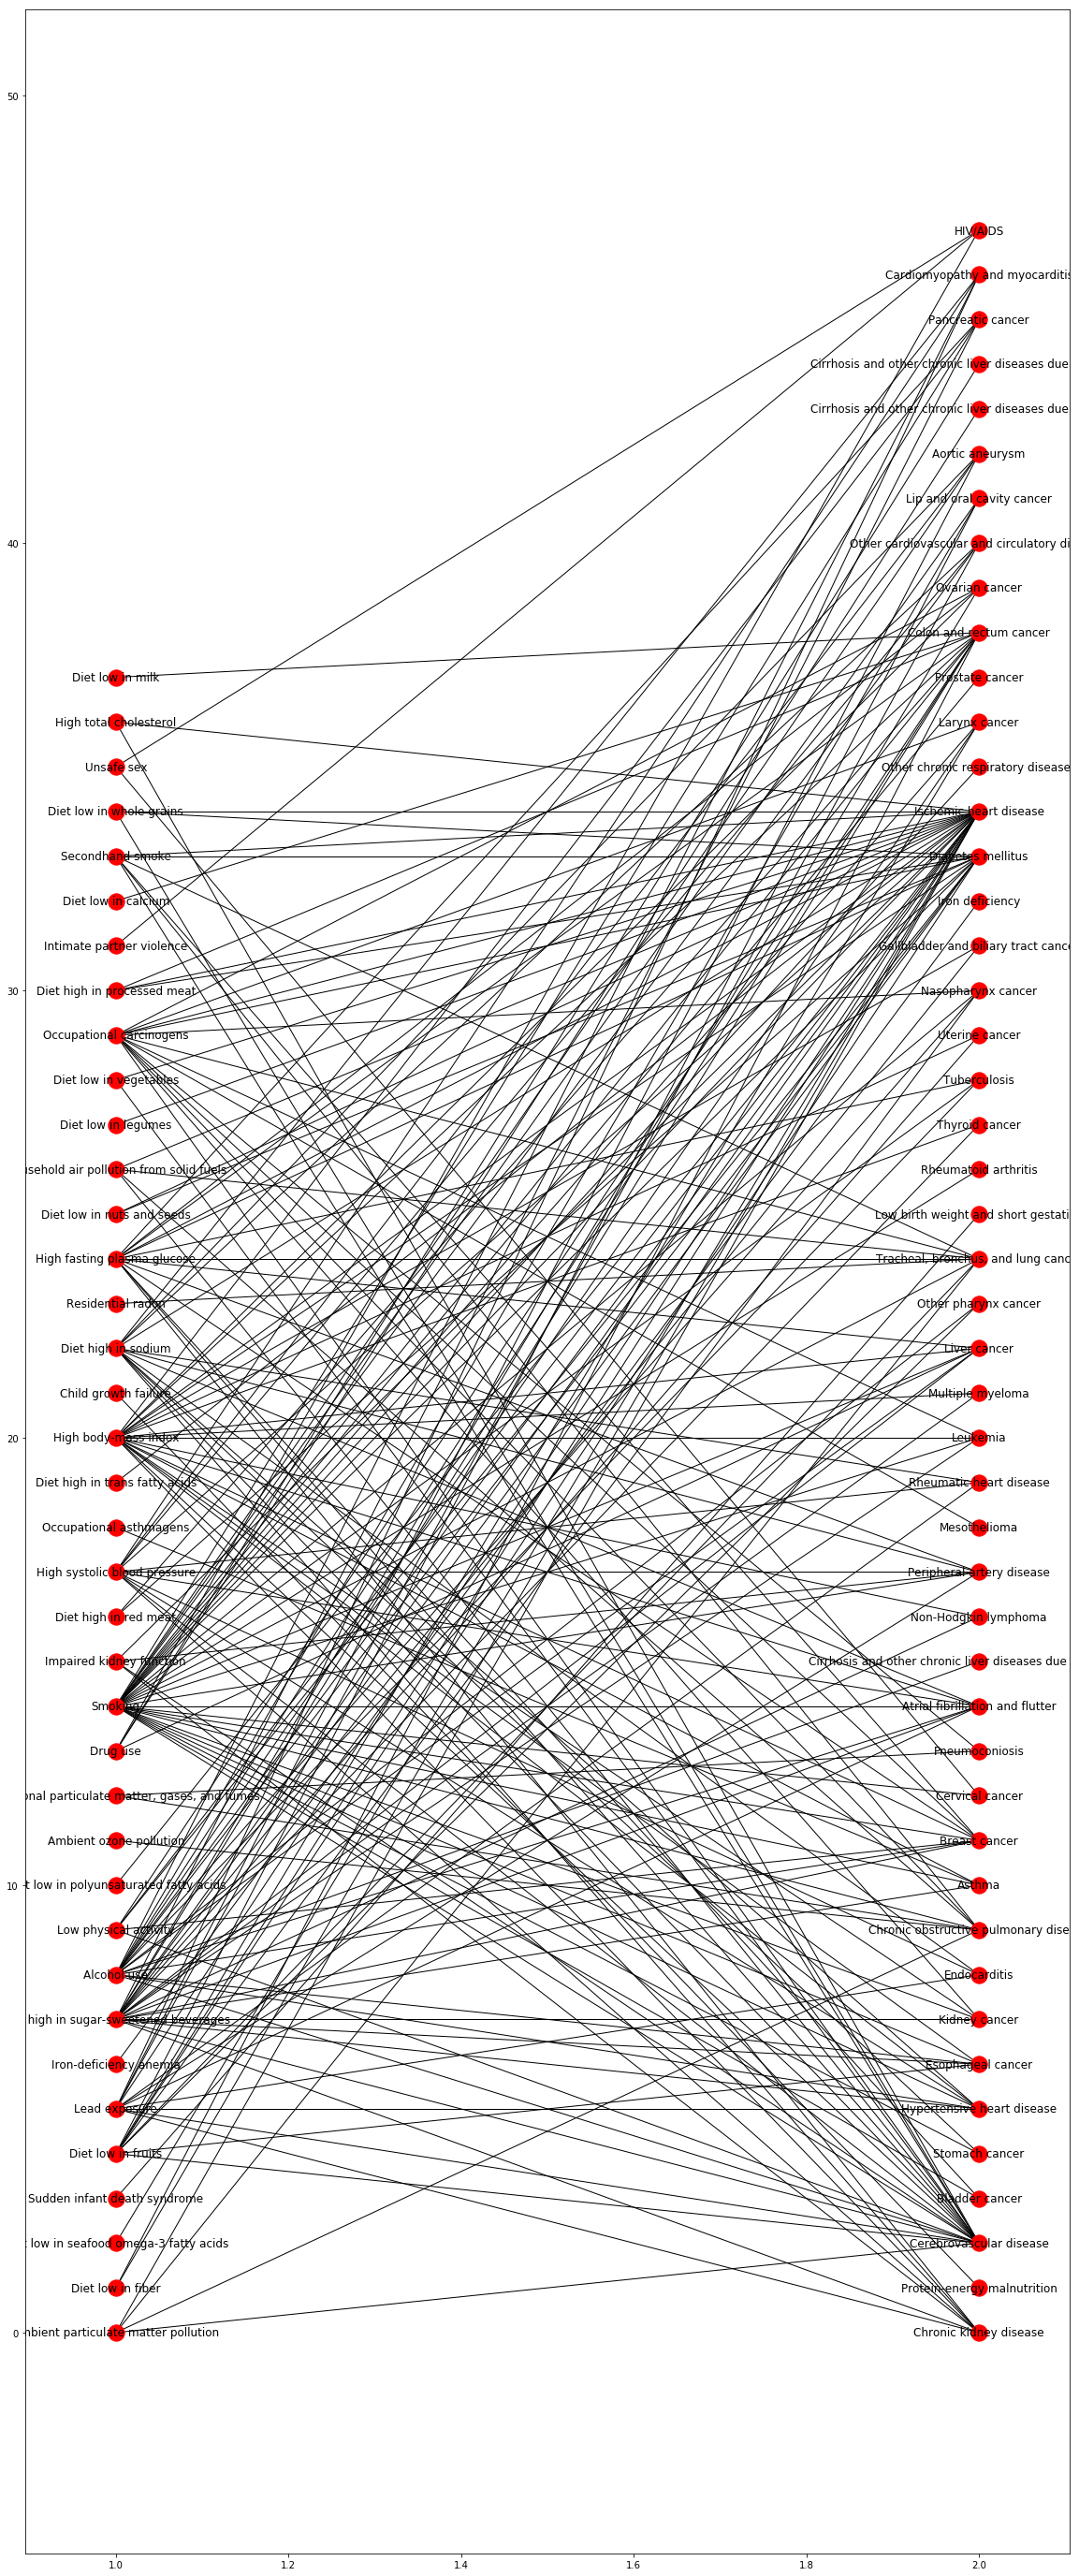

In [113]:
B = nx.Graph()
B.add_nodes_from(nodes_risk, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(nodes_cause, bipartite=1)
B.add_edges_from(nodes_match)


# Separate by group
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))


nx.draw_networkx(B, pos=pos)
plt.show()

In [114]:
grp_risk = df.groupby('risk').count()


In [115]:
headers = grp_risk.dtypes.index

In [116]:
grp_risk = grp_risk.drop('ID', axis=1)

In [117]:
nx.bipartite.maximum_matching(B)

{'Alcohol use': 'Cirrhosis and other chronic liver diseases due to alcohol use',
 'Ambient particulate matter pollution': 'Chronic obstructive pulmonary disease',
 'Asthma': 'Occupational asthmagens',
 'Atrial fibrillation and flutter': 'Lead exposure',
 'Bladder cancer': 'Smoking',
 'Breast cancer': 'Secondhand smoke',
 'Cerebrovascular disease': 'Household air pollution from solid fuels',
 'Cervical cancer': 'Unsafe sex',
 'Child growth failure': 'Protein-energy malnutrition',
 'Chronic kidney disease': 'Diet high in sugar-sweetened beverages',
 'Chronic obstructive pulmonary disease': 'Ambient particulate matter pollution',
 'Cirrhosis and other chronic liver diseases due to alcohol use': 'Alcohol use',
 'Colon and rectum cancer': 'Diet low in fiber',
 'Diabetes mellitus': 'Low physical activity',
 'Diet high in sodium': 'Other cardiovascular and circulatory diseases',
 'Diet high in sugar-sweetened beverages': 'Chronic kidney disease',
 'Diet low in fiber': 'Colon and rectum cancer

In [118]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

Current size: [20.0, 50.0]


In [119]:
nodes_match

[['Alcohol use',
  'Cirrhosis and other chronic liver diseases due to alcohol use'],
 ['Alcohol use', 'Nasopharynx cancer'],
 ['Alcohol use', 'Lip and oral cavity cancer'],
 ['Alcohol use', 'Diabetes mellitus'],
 ['Alcohol use', 'Esophageal cancer'],
 ['Alcohol use', 'Larynx cancer'],
 ['Alcohol use', 'Hypertensive heart disease'],
 ['Alcohol use', 'Ischemic heart disease'],
 ['Alcohol use', 'Breast cancer'],
 ['Alcohol use', 'Other pharynx cancer'],
 ['Alcohol use', 'Colon and rectum cancer'],
 ['Alcohol use', 'Liver cancer'],
 ['Alcohol use', 'Atrial fibrillation and flutter'],
 ['Alcohol use', 'Tuberculosis'],
 ['Alcohol use', 'Cardiomyopathy and myocarditis'],
 ['Alcohol use', 'Cerebrovascular disease'],
 ['Ambient ozone pollution', 'Chronic obstructive pulmonary disease'],
 ['Ambient particulate matter pollution', 'Cerebrovascular disease'],
 ['Ambient particulate matter pollution',
  'Tracheal, bronchus, and lung cancer'],
 ['Ambient particulate matter pollution',
  'Chronic obst

In [120]:
unique_risk = list(sorted(set(nodes_risk)))
len(unique_risk)

38

In [121]:
len(nodes_risk)

213

In [122]:
grp_risk.rename(columns={'cause': 'count'}, inplace=True)
grp_risk


count
risk                                                    
Alcohol use                                           16
Ambient ozone pollution                                1
Ambient particulate matter pollution                   4
Child growth failure                                   1
Diet high in processed meat                            3
Diet high in red meat                                  2
Diet high in sodium                                   12
Diet high in sugar-sweetened beverages                20
Diet high in trans fatty acids                         1
Diet low in calcium                                    1
Diet low in fiber                                      2
Diet low in fruits                                     9
Diet low in legumes                                    1
Diet low in milk                                       1
Diet low in nuts and seeds                             2
Diet low in polyunsaturated fatty acids                1
Diet low in seafood omega-3 fatty acids                1
Diet low in vegetables                                 2
Diet low in whole grains                               3
Drug use                                               4
High body-mass index                                  20
High fasting plasma glucose                           13
High systolic blood pressure                          11
High total cholesterol                                 2
Household air pollution from solid fuels               4
Impaired kidney function                               4
Intimate partner violence                              1
Iron deficiency                                        1
Lead exposure                                         11
Low birth weight and short gestation                   1
Low physical activity                                  5
Occupational asthmagens                                1
Occupational carcinogens                              13
Occupational particulate matter, gases, and fumes      2
Residential radon                                      1
Secondhand smoke                                       6
Smoking                                               28
Unsafe sex                                             2

In [123]:
count_list = grp_risk['count'].tolist()
count_list = map(int, count_list)

In [124]:
src_dest = []
for i in range(len(nodes_match)):
    for j in range(len(nodes_match)):
        if i != j and j+1 < len(nodes_match):
            if nodes_match[i][0] == nodes_match[j][0]:
                src_dest.append([nodes_match[i][1],nodes_match[i][0],nodes_match[j][1]])

In [125]:
src_dest

[['Cirrhosis and other chronic liver diseases due to alcohol use',
  'Alcohol use',
  'Nasopharynx cancer'],
 ['Cirrhosis and other chronic liver diseases due to alcohol use',
  'Alcohol use',
  'Lip and oral cavity cancer'],
 ['Cirrhosis and other chronic liver diseases due to alcohol use',
  'Alcohol use',
  'Diabetes mellitus'],
 ['Cirrhosis and other chronic liver diseases due to alcohol use',
  'Alcohol use',
  'Esophageal cancer'],
 ['Cirrhosis and other chronic liver diseases due to alcohol use',
  'Alcohol use',
  'Larynx cancer'],
 ['Cirrhosis and other chronic liver diseases due to alcohol use',
  'Alcohol use',
  'Hypertensive heart disease'],
 ['Cirrhosis and other chronic liver diseases due to alcohol use',
  'Alcohol use',
  'Ischemic heart disease'],
 ['Cirrhosis and other chronic liver diseases due to alcohol use',
  'Alcohol use',
  'Breast cancer'],
 ['Cirrhosis and other chronic liver diseases due to alcohol use',
  'Alcohol use',
  'Other pharynx cancer'],
 ['Cirrho

In [126]:
#src_dest2 = []
#for i in range(len(src_dest)):
#   for j in range(len(src_dest)):
#        if i != j and j+1 < len(src_dest):
#            if src_dest[i][0] == src_dest[j][2] and src_dest[i][2] == src_dest[j][0]:
#                print src_dest[i][0]+" | "+ src_dest[j][2] +" | "+ src_dest[i][2] +" | "+ src_dest[j][0]
#                #src_dest2.append([src_dest[i][1],src_dest[i][0],src_dest[j][1]])


In [127]:
labels = ['src', 'risk', 'des']
df_srcdest = pd.DataFrame.from_records(src_dest, columns=labels)

In [128]:
df_srcdest.sort_values(['src','risk'])
#df_srcdest.to_csv('src_dest.csv')

src                                    risk  \
359   Aortic aneurysm                     Diet high in sodium   
360   Aortic aneurysm                     Diet high in sodium   
361   Aortic aneurysm                     Diet high in sodium   
362   Aortic aneurysm                     Diet high in sodium   
363   Aortic aneurysm                     Diet high in sodium   
364   Aortic aneurysm                     Diet high in sodium   
365   Aortic aneurysm                     Diet high in sodium   
366   Aortic aneurysm                     Diet high in sodium   
367   Aortic aneurysm                     Diet high in sodium   
368   Aortic aneurysm                     Diet high in sodium   
369   Aortic aneurysm                     Diet high in sodium   
1494  Aortic aneurysm            High systolic blood pressure   
1495  Aortic aneurysm            High systolic blood pressure   
1496  Aortic aneurysm            High systolic blood pressure   
1497  Aortic aneurysm            High systolic blood pressure   
1498  Aortic aneurysm            High systolic blood pressure   
1499  Aortic aneurysm            High systolic blood pressure   
1500  Aortic aneurysm            High systolic blood pressure   
1501  Aortic aneurysm            High systolic blood pressure   
1502  Aortic aneurysm            High systolic blood pressure   
1503  Aortic aneurysm            High systolic blood pressure   
1580  Aortic aneurysm                           Lead exposure   
1581  Aortic aneurysm                           Lead exposure   
1582  Aortic aneurysm                           Lead exposure   
1583  Aortic aneurysm                           Lead exposure   
1584  Aortic aneurysm                           Lead exposure   
1585  Aortic aneurysm                           Lead exposure   
1586  Aortic aneurysm                           Lead exposure   
1587  Aortic aneurysm                           Lead exposure   
1588  Aortic aneurysm                           Lead exposure   
...               ...                                     ...   
590    Uterine cancer  Diet high in sugar-sweetened beverages   
591    Uterine cancer  Diet high in sugar-sweetened beverages   
592    Uterine cancer  Diet high in sugar-sweetened beverages   
593    Uterine cancer  Diet high in sugar-sweetened beverages   
594    Uterine cancer  Diet high in sugar-sweetened beverages   
595    Uterine cancer  Diet high in sugar-sweetened beverages   
596    Uterine cancer  Diet high in sugar-sweetened beverages   
597    Uterine cancer  Diet high in sugar-sweetened beverages   
598    Uterine cancer  Diet high in sugar-sweetened beverages   
599    Uterine cancer  Diet high in sugar-sweetened beverages   
600    Uterine cancer  Diet high in sugar-sweetened beverages   
1153   Uterine cancer                    High body-mass index   
1154   Uterine cancer                    High body-mass index   
1155   Uterine cancer                    High body-mass index   
1156   Uterine cancer                    High body-mass index   
1157   Uterine cancer                    High body-mass index   
1158   Uterine cancer                    High body-mass index   
1159   Uterine cancer                    High body-mass index   
1160   Uterine cancer                    High body-mass index   
1161   Uterine cancer                    High body-mass index   
1162   Uterine cancer                    High body-mass index   
1163   Uterine cancer                    High body-mass index   
1164   Uterine cancer                    High body-mass index   
1165   Uterine cancer                    High body-mass index   
1166   Uterine cancer                    High body-mass index   
1167   Uterine cancer                    High body-mass index   
1168   Uterine cancer                    High body-mass index   
1169   Uterine cancer                    High body-mass index   
1170   Uterine cancer                    High body-mass index   
1171   Uterine cancer                    High body-ma

In [129]:
 df_srcdest_count = df_srcdest.groupby(['src','des']).count()
 df_srcdest_count.rename(columns={'risk': 'count'}, inplace=True)
 df_srcdest_count = df_srcdest_count.sort_values('count')

In [130]:
 df_srcdest_count

count
src                                 des                                                      
Aortic aneurysm                     Asthma                                                  1
Diabetes mellitus                   Prostate cancer                                         1
                                    Rheumatoid arthritis                                    1
                                    Stomach cancer                                          1
Pancreatic cancer                   Aortic aneurysm                                         1
Ovarian cancer                      Tuberculosis                                            1
                                    Pneumoconiosis                                          1
Diabetes mellitus                   Pneumoconiosis                                          1
Ovarian cancer                      Peripheral artery disease                               1
                                    Mesothelioma                                            1
                                    Larynx cancer                                           1
Endocarditis                        Stomach cancer                                          1
Esophageal cancer                   Aortic aneurysm                                         1
Ovarian cancer                      Chronic obstructive pulmonary disease                   1
Esophageal cancer                   Bladder cancer                                          1
Ovarian cancer                      Nasopharynx cancer                                      1
Pancreatic cancer                   Cervical cancer                                         1
                                    Chronic obstructive pulmonary disease                   1
Diabetes mellitus                   Other chronic respiratory diseases                      1
Peripheral artery disease           Cervical cancer                                         1
Diabetes mellitus                   Cardiomyopathy and myocarditis                          1
Peripheral artery disease           Asthma                                                  1
Diabetes mellitus                   Cervical cancer                                         1
                                    Cirrhosis and other chronic liver diseases due ...      1
Pancreatic cancer                   Stomach cancer                                          1
                                    Rheumatoid arthritis                                    1
                                    Prostate cancer                                         1
                                    Other chronic respiratory diseases                      1
                                    Other cardiovascular and circulatory diseases           1
                                    Nasopharynx cancer                                      1
...                                                                                       ...
Ischemic heart disease              Tracheal, bronchus, and lung cancer                     7
Cerebrovascular disease             Hypertensive heart disease                              7
Hypertensive heart disease          Ischemic heart disease                                  7
Tracheal, bronchus, and lung cancer Cerebrovascular disease                                 7
Chronic kidney disease              Cerebrovascular disease                                 7
Ischemic heart disease              Atrial fibrillation and flutter                         7
Tracheal, bronchus, and lung cancer Ischemic heart disease                                  7
Hypertensive heart disease          Cerebrovascular disease                                 7
Cerebrovascular disease             Chronic kidney disease                                  7
Chronic kidney disease              Ischemic heart disease                                  7
Atrial fibrillation and flutter     Ischemic h

In [131]:
df_srcdest.loc[(df_srcdest['src'] == 'Aortic aneurysm') & (df_srcdest['des'] == 'Cerebrovascular disease')]

src                          risk                      des
366   Aortic aneurysm           Diet high in sodium  Cerebrovascular disease
1496  Aortic aneurysm  High systolic blood pressure  Cerebrovascular disease
1585  Aortic aneurysm                 Lead exposure  Cerebrovascular disease
2419  Aortic aneurysm                       Smoking  Cerebrovascular disease

In [132]:
weights = df_srcdest_count['count'].values.tolist()

In [133]:
weights = map(int, weights)
#weights


In [134]:
df_srcdest_count=df_srcdest_count.sort_values('count') 
df_srcdest_count.to_csv('src_dest_count.csv')

In [135]:
g_df = pd.read_csv('src_dest_count.csv')

In [136]:
g_nodes = g_df['src'].values.tolist()
g_edges = g_df['des'].values.tolist()
g_match = [list(a) for a in zip(g_nodes,g_edges)]


In [137]:
it  = iter(g_nodes)
it2 = iter(g_edges)
it3 = zip(it, it2)


In [138]:
counter = g_df.groupby('count').count()
counter

src  des
count          
1      529  529
2      324  324
3      166  166
4      114  114
5       30   30
6        8    8
7       18   18
8       10   10
10       2    2
12       2    2
18       2    2

In [139]:
c = counter['des'].values.tolist()
c = map(int, c)
c

[529, 324, 166, 114, 30, 8, 18, 10, 2, 2, 2]

In [140]:
values = [1,2,3,4,5,6,7,8,10,12,18]

In [141]:
g_match

[['Aortic aneurysm', 'Asthma'],
 ['Atrial fibrillation and flutter', 'Prostate cancer'],
 ['Cardiomyopathy and myocarditis', 'Other pharynx cancer'],
 ['Breast cancer', 'Mesothelioma'],
 ['Stomach cancer', 'Tracheal, bronchus, and lung cancer'],
 ['Stomach cancer', 'Rheumatoid arthritis'],
 ['Breast cancer', 'Other cardiovascular and circulatory diseases'],
 ['Breast cancer', 'Other chronic respiratory diseases'],
 ['Breast cancer', 'Other pharynx cancer'],
 ['Stomach cancer', 'Rheumatic heart disease'],
 ['Stomach cancer', 'Prostate cancer'],
 ['Breast cancer', 'Pneumoconiosis'],
 ['Breast cancer', 'Prostate cancer'],
 ['Breast cancer', 'Rheumatoid arthritis'],
 ['Breast cancer', 'Stomach cancer'],
 ['Stomach cancer', 'Pancreatic cancer'],
 ['Stomach cancer', 'Other chronic respiratory diseases'],
 ['Stomach cancer', 'Nasopharynx cancer'],
 ['Stomach cancer', 'Lip and oral cavity cancer'],
 ['Cardiomyopathy and myocarditis', 'Breast cancer'],
 ['Stomach cancer', 'Leukemia'],
 ['Stomac

In [142]:
len(values) == len(c)

True

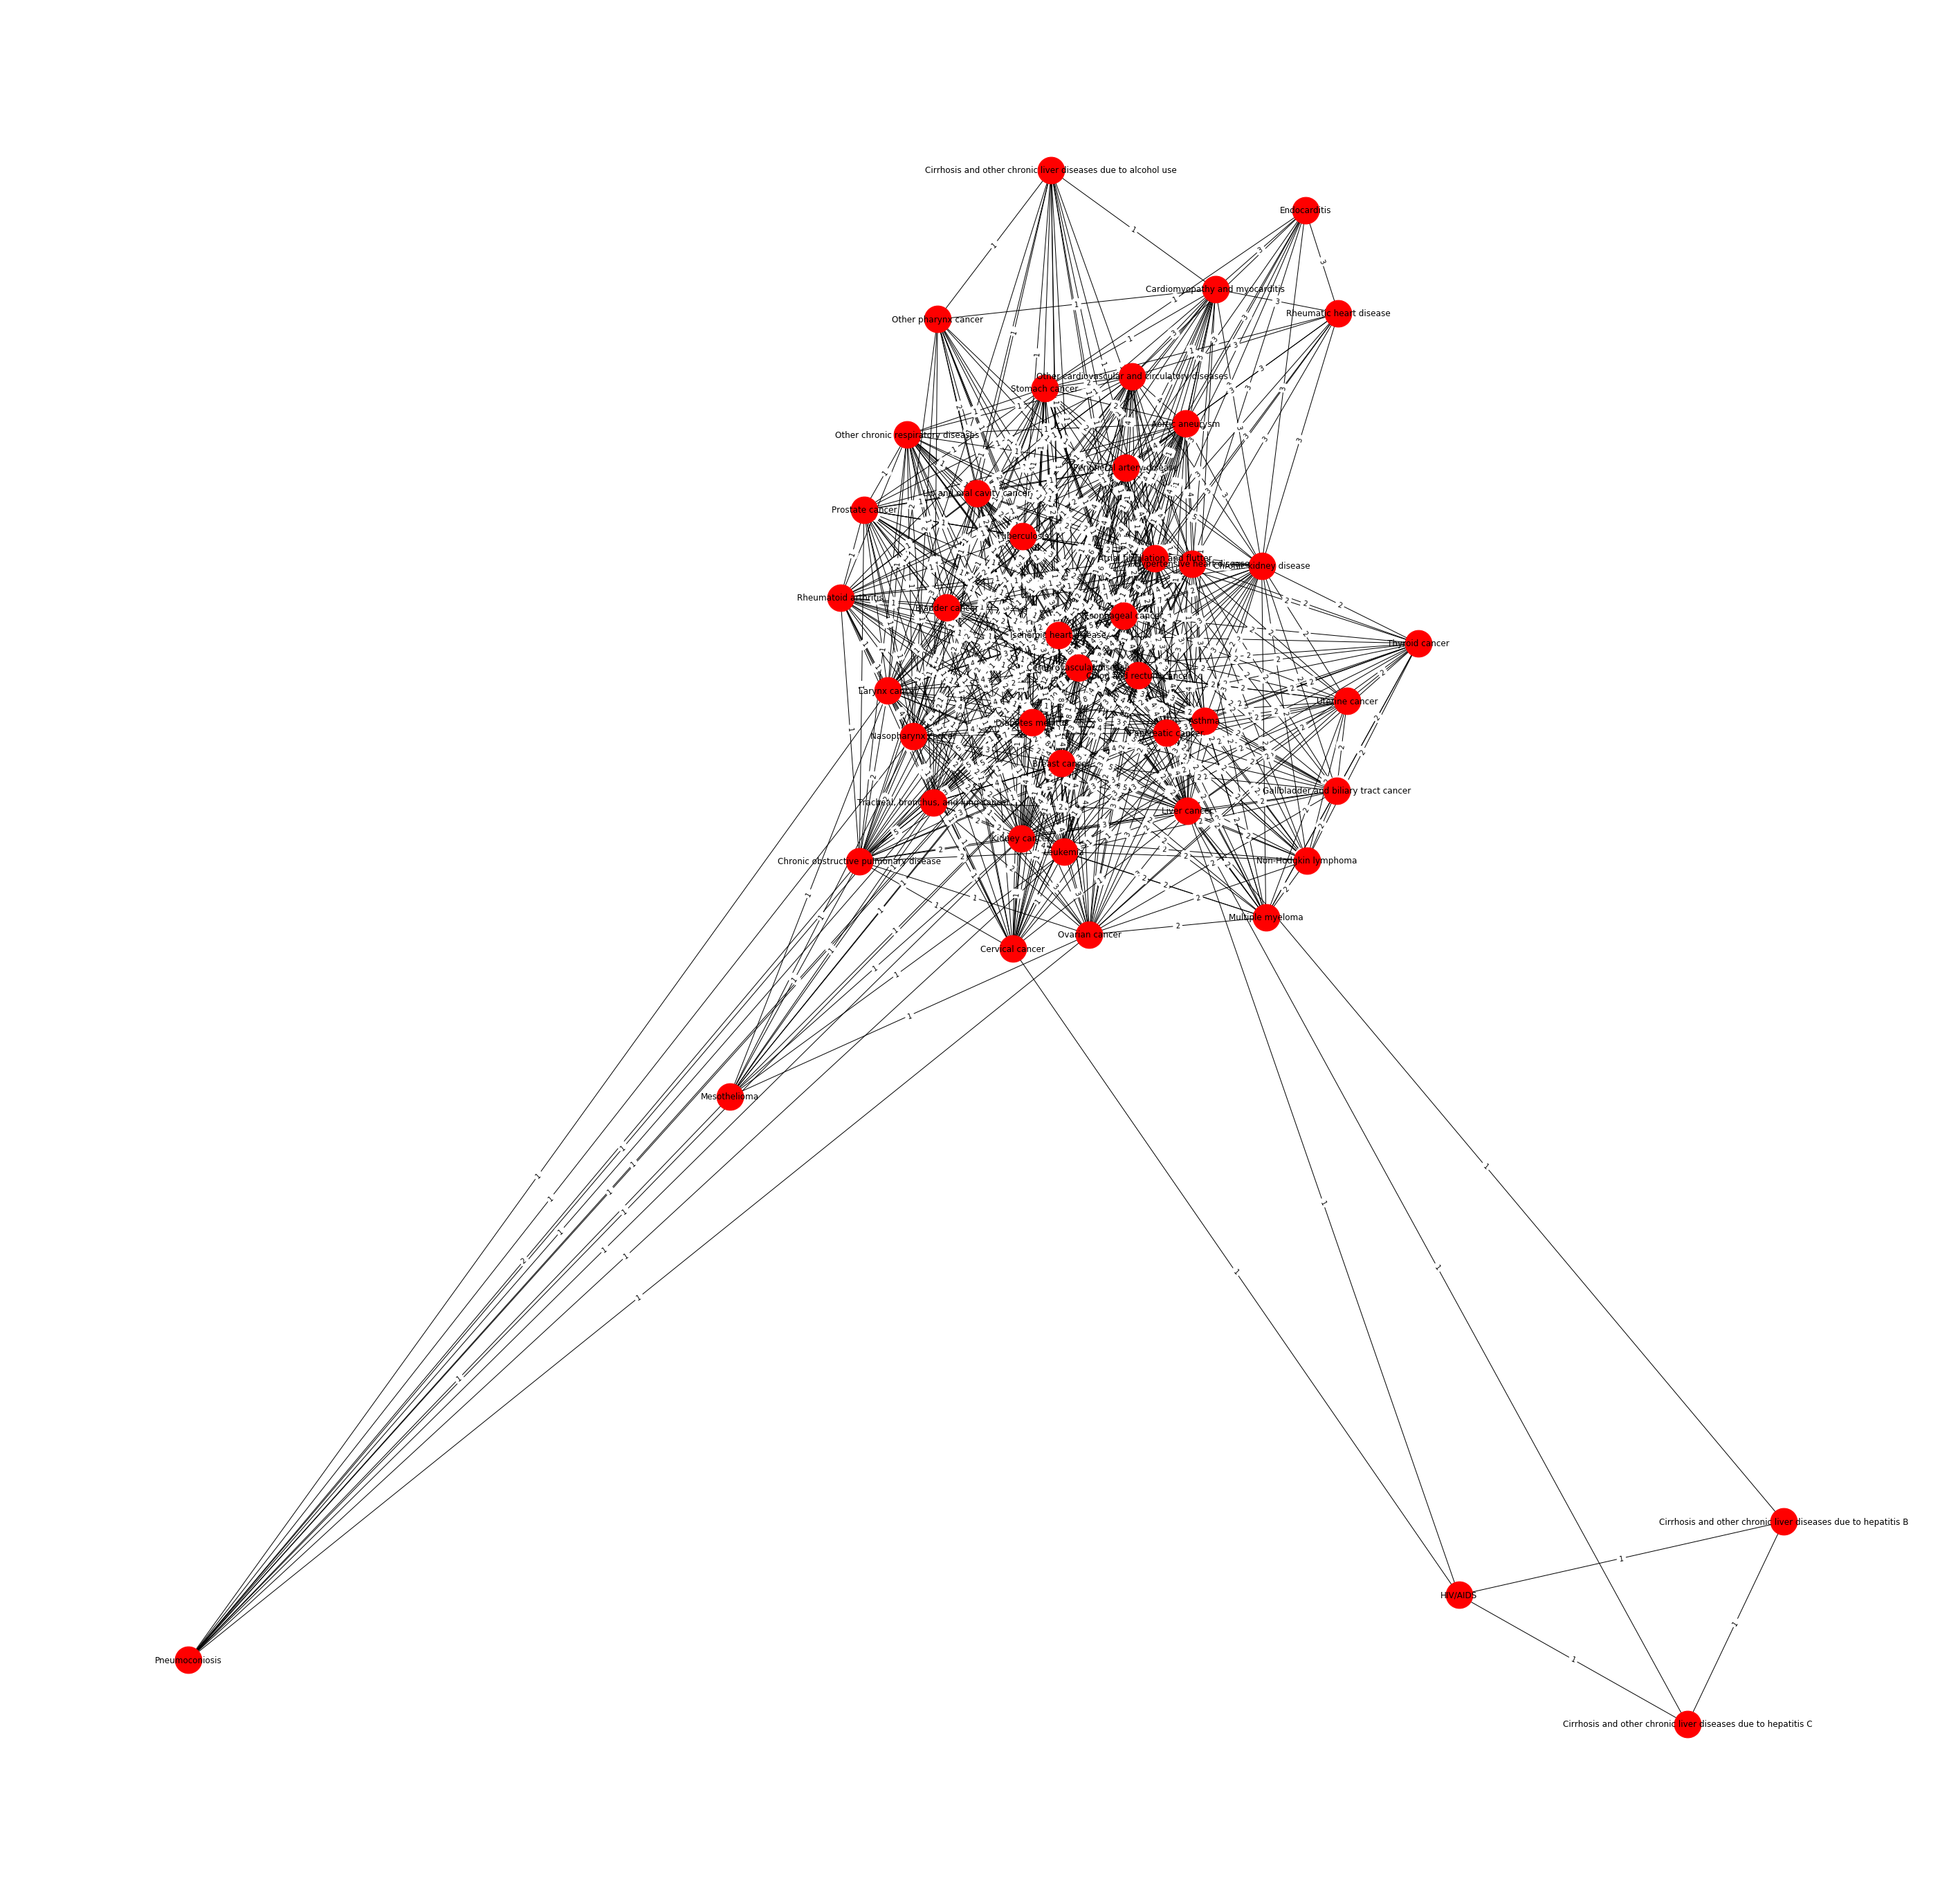

In [143]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 50
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size
G = nx.Graph()


#start = 0
#end = c[i]-1
#for i in range(len(values)):
#    G.add_edges_from(g_match[start:end+c[i]], weight=values[i])
#    start = start + c[i] + 1
    
G.add_edges_from(g_match[0:528], weight=1)
G.add_edges_from(g_match[529:852], weight=2)
G.add_edges_from(g_match[853:1018], weight=3)
G.add_edges_from(g_match[1019:1132], weight=4)
G.add_edges_from(g_match[1133:1162], weight=5)
G.add_edges_from(g_match[1163:1170], weight=6)
G.add_edges_from(g_match[1171:1188], weight=7)
G.add_edges_from(g_match[1189:1198], weight=8)
G.add_edges_from(g_match[1199:1200], weight=10)
G.add_edges_from(g_match[1201:1202], weight=12)
G.add_edges_from(g_match[1203:1204], weight=18)

[529, 324, 166, 114, 30, 8, 18, 10, 2, 2, 2]
[1,2,3,4,5,6,7,8,10,12,18]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])


pos=nx.spring_layout(G)

nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

node_labels = {node:node for node in G.nodes()}; 

nx.draw_networkx_labels(G, pos, labels=node_labels)

nx.draw(G,pos, node_size=1500)
plt.show()


In [144]:
from networkx.algorithms.approximation import clique
print(clique.max_clique(G))

set(['Mesothelioma', 'Pneumoconiosis'])
